In [1]:
import salem
from salem import geogrid_simulator
import warnings
warnings.filterwarnings('ignore')

In [2]:
fpath ='/exports/csce/datastore/geos/users/s1878599/namelist.wps'

In [3]:
g, maps = geogrid_simulator(fpath)

In [4]:
maps[0].set_rgb(natural_earth='lr')  # add a background image

{'imshow': <matplotlib.image.AxesImage at 0x7fdb9ebae340>,
 'contour': [],
 'contourf': []}

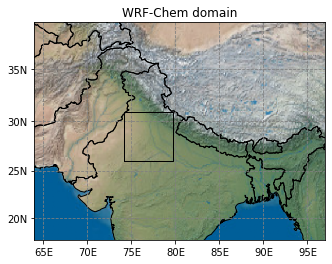

In [5]:
maps[0].visualize(title='WRF-Chem domain')

In [16]:
def map_2D(dataset, var_name, level=0, mask_values=None,
           title=None, cmap = 'OrRd', coastline=True, borders=True,
           pixels=False, save=False, format='pdf', dpi=1000):


    import matplotlib.pyplot as plt
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import numpy as np
    
    
    # ------------------------- DRAW THE MAP --------------------------------
    # draw map.
    ax = plt.subplot(projection=ccrs.PlateCarree())
 
    # draw meridians and parallels.
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                          linewidth=0.5, color='k', alpha=0.4, linestyle='-')
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    gl.xlabel_style = {'size': 10, 'color': 'gray'}
    gl.ylabel_style = {'size': 10, 'color': 'grey'}


    # draw coastlines and borders.
    if coastline:
        ax.add_feature(cfeature.COASTLINE, lw=0.5)
    if borders:
        ax.add_feature(cfeature.BORDERS, lw=0.5)

   # ------------------------- GET DATA TO PLOT------------------------------
   
    # get variable from dataset.   
    var = dataset[var_name]
      
    # plot data at desired level.
    long = dataset.XLONG.values[0,:, :]
    lat = dataset.XLAT.values[0,:, :]
    
    if mask_values is None:
        var_values = var[0,:,:]
    else: 
        var_values= np.ma.masked_where(var[0,:,:].values < mask_values,
                                       var[0,:,:].values) 
   

   # -------------------------  PLOT DATA ----------------------------------
    
    #plot type: contourf or pcolormesh.
    if pixels:
        cs = plt.pcolormesh(long, lat,var_values,
            transform=ccrs.PlateCarree(), cmap =cmap)
    else:    
        cs = plt.contourf(long, lat, var_values,
            transform=ccrs.PlateCarree(), cmap=cmap)
    
    # colorbar.
    cbar = plt.colorbar(cs, orientation="horizontal",pad=0.09,shrink=0.75)
    cbar.set_label(r'$\mu$g m-3')
    
    #title.
    ax.set_title(title)
    
    #save
    if save:
        plt.savefig( save + '.' + format, format=format, dpi=dpi)
    
    plt.show()

In [15]:
#import modules
import xarray as xr
import numpy as np
import pandas as pd
import salem
import plotly.graph_objects as go
import salem
import sys
sys.path.append('/exports/csce/datastore/geos/users/s1878599/python_code/')
from WRFChemToolkit.analysis import aerosols_202 as aer, plots as pt, statistics as st, IGP as igp

import warnings
warnings.filterwarnings('ignore')

In [9]:
#Get IGP data for each season
a_pth='/geos/d21/s1878599/IGP/outputs/autumn/base/wrfout*.nc'
a =xr.open_mfdataset(a_pth)

In [10]:
aer = aer.get_aerosols(a)

In [11]:
aer["tot_OA"] = aer.pm10_SOA + aer.pm10_POA
aer.tot_OA.attrs["units"]="ug m-3"

In [12]:
aert = st.time_mean(aer,"Time")

In [13]:
import salem
shdf= salem.read_shapefile("/exports/csce/datastore/geos/users/s1878599//python_code/gadm_data/PIB/PIB.shp")
aert.attrs=a.attrs
aert_igp=aert.salem.roi(shape=shdf) 

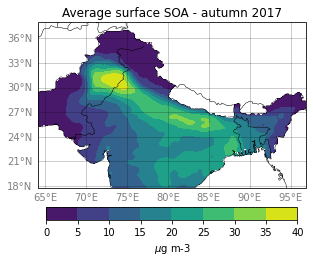

In [17]:
map_2D(aert_igp,'pm10_SOA', cmap='viridis',title='Average surface SOA - autumn 2017')

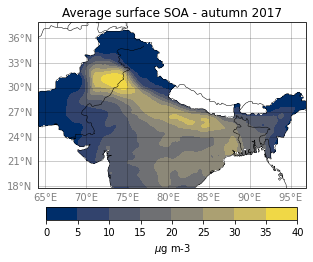

In [18]:
map_2D(aert_igp,'pm10_SOA', cmap='cividis',title='Average surface SOA - autumn 2017')